In [24]:
import numpy as np
import pandas as pd
import pyvista as pv
import xarray as xr

In [4]:
TISA = np.loadtxt(r"C:\Users\rscott\Downloads\Gawler\AUSLAMP\149489_00_0\AusLAMP_model_sgrid\AusLAMP_3D_model__ascii@@", skiprows = 3)

In [5]:
names = ['X'               ,'Y'              ,'Z'                ,'Resistivity'        ,'I'        ,'J'        ,'K']

In [6]:
dfTISA = pd.DataFrame(TISA, columns=names)

In [7]:
dfTISA.head()

,X,Y,Z,Resistivity,I,J,K
0,-875410.847168,5.066984e+06,-4260.0,0.300001,0.0,0.0,0.0
1,-875410.847168,5.081984e+06,-4260.0,0.300001,1.0,0.0,0.0
2,-875410.847168,5.096984e+06,-4260.0,300.843445,2.0,0.0,0.0
3,-875410.847168,5.111984e+06,-4260.0,0.300001,3.0,0.0,0.0
4,-875410.847168,5.126984e+06,-4260.0,0.300001,4.0,0.0,0.0


In [8]:
dfTISA.to_csv(r'C:\Users\rscott\Downloads\Gawler\AUSLAMP\149489_00_0\AusLAMP_model_sgrid\149489.csv', index=False)

In [9]:
dfTISA

,X,Y,Z,Resistivity,I,J,K
0,-8.754108e+05,5.066984e+06,-4260.0,0.300001,0.0,0.0,0.0
1,-8.754108e+05,5.081984e+06,-4260.0,0.300001,1.0,0.0,0.0
2,-8.754108e+05,5.096984e+06,-4260.0,300.843445,2.0,0.0,0.0
3,-8.754108e+05,5.111984e+06,-4260.0,0.300001,3.0,0.0,0.0
4,-8.754108e+05,5.126984e+06,-4260.0,0.300001,4.0,0.0,0.0
...,...,...,...,...,...,...,...
2481475,1.854589e+06,8.381984e+06,-286860.0,-99999.000000,221.0,182.0,59.0
2481476,1.854589e+06,8.396984e+06,-286860.0,-99999.000000,222.0,182.0,59.0
2481477,1.854589e+06,8.411984e+06,-286860.0,-99999.000000,223.0,182.0,59.0
2481478,1.854589e+06,8.426984e+06,-286860.0,-99999.000000,224.0,182.0,59.0


In [10]:
dfTISA['X'].unique().size

183

In [11]:
dfTISA['X'].unique()

array([-875410.84716797, -860410.84765625, -845410.84765625,
       -830410.84765625, -815410.84765625, -800410.84375   ,
       -785410.84375   , -770410.84375   , -755410.84375   ,
       -740410.84375   , -725410.84375   , -710410.84375   ,
       -695110.84375   , -680710.84375   , -665410.84375   ,
       -650110.84375   , -635410.84375   , -620410.84375   ,
       -605710.84375   , -590710.84375   , -575410.84375   ,
       -560710.84375   , -545410.84375   , -530410.84375   ,
       -515410.84375   , -499510.84375   , -485410.84375   ,
       -470410.84375   , -455410.84375   , -440110.84375   ,
       -425410.84375   , -410410.84375   , -395410.84375   ,
       -380410.84375   , -365410.84375   , -350410.84375   ,
       -335110.875     , -320410.875     , -305410.875     ,
       -290710.875     , -275710.875     , -260410.875     ,
       -245410.875     , -230410.875     , -215410.875     ,
       -200410.875     , -185410.875     , -170110.875     ,
       -155110.875     ,

In [12]:
df = dfTISA.sort_values(['Z', 'Y', 'X'], ascending=[True, True, True])

In [13]:
np.asarray(df[['X','Y','Z']]).shape

(2481480, 3)

In [16]:
dfTISA['Y'].unique().size

226

In [17]:
dfTISA['Z'].unique().size

60

In [19]:
grid = pv.RectilinearGrid( df['X'].unique(),df['Y'].unique(),df['Z'].unique())
grid

RectilinearGrid,Information
N Cells,2416050
N Points,2481480
X Bounds,"-8.754e+05, 1.855e+06"
Y Bounds,"5.067e+06, 8.442e+06"
Z Bounds,"-2.869e+05, -4.260e+03"
Dimensions,"183, 226, 60"
N Arrays,0


In [37]:
df['logres'] = -9999
df.loc[df.Resistivity >0,'logres'] = np.log(df['Resistivity'])

In [38]:
grid['resistivity'] = df['Resistivity']
#grid['logres'] = np.log(grid['resistivity'])
grid['logres'] = df['logres']
grid.plot(scalars='logres', clim=(0,10),cmap='seismic_r',show_grid=True)

Widget(value="<iframe src='http://localhost:63581/index.html?ui=P_0x239a5f879a0_7&reconnect=auto' style='width…

In [39]:
grid['resistivity']

pyvista_ndarray([-99999., -99999., -99999., ..., -99999., -99999.,
                 -99999.])

In [40]:
grid.save(r'C:\Users\rscott\Downloads\Gawler\AUSLAMP\149489_00_0\AusLAMP_model_sgrid\AusLAMP_SEA.vtr')

In [43]:
ds = xr.open_dataset(r'C:\Users\rscott\Downloads\Gawler\AUSLAMP\149489_00_0\AusLAMP_model_sgrid\AusLAMP_SEA.vtr', engine="pyvista")
ds["logres"].pyvista.plot(x="x", y="y", z="z",clim=[0,1])

Widget(value="<iframe src='http://localhost:63581/index.html?ui=P_0x239bb0dcb20_10&reconnect=auto' style='widt…

In [54]:
def df_to_xarray(df, data):
    data = np.asarray(df[data]).reshape(df.z.unique().size,df.y.unique().size,df.x.unique().size)
    da = xr.DataArray(data=data,dims=["z","y","x"],coords={"z":df.z.unique(),"y":df.y.unique(),"x":df.x.unique()})
    #da.rio.write_crs('EPSG:4326',inplace=True)
    return da


In [58]:
df.columns = ['x', 'y', 'z', 'Resistivity', 'I', 'J', 'K', 'logres']

In [59]:
da = df_to_xarray(df,'logres')

In [60]:
da

<xarray.DataArray (z: 60, y: 226, x: 183)>
array([[[-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        ...,
        [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
        [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03]],

       [[ 5.70102997e+00,  5.70111004e+00,  5.70108995e+00, ...,
          5.67408005e+00,  5.67370996e+00, -9.99900000e+03],
        [ 5.70082002e+00,  5.70092000e+00,  5.70092000e+00, ...,
          5.67460000e+00,  5.67424005e+00, -9.99900000e+03],
        [ 5.70057002e+00,  5.70069003e+00,  5.70069003e+00, ...,
          5.67406999e+00,  5.67372002e+00, -9.99900000e+03],
...
        [ 5.70330995e+00,  5.70344001e+00,  5.70351999e+00, ...,
         -1.20396949e+00, -1.20396949e+00, -9.99900000e+03],
        [ 5.70329000e+00,  5.70340999e+00,  5.70348000e+00, ...,
         -1.20396949e+00, -1.20396949e+00, -9.99900000e+03],
        [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03]],

       [[-1.20396949e+00, -1.20396949e+00, -1.20396949e+00, ...,
         -1.20396949e+00, -1.20396949e+00, -9.99900000e+03],
        [-1.20396949e+00, -1.20396949e+00, -1.20396949e+00, ...,
         -1.20396949e+00, -1.20396949e+00, -9.99900000e+03],
        [ 5.70659001e+00, -1.20396949e+00, -1.20396949e+00, ...,
         -1.20396949e+00, -1.20396949e+00, -9.99900000e+03],
        ...,
        [ 5.70333997e+00,  5.70345995e+00,  5.70354003e+00, ...,
         -1.20396949e+00, -1.20396949e+00, -9.99900000e+03],
        [ 5.70332003e+00,  5.70343004e+00,  5.70350005e+00, ...,
         -1.20396949e+00, -1.20396949e+00, -9.99900000e+03],
        [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, ...,
         -9.99900000e+03, -9.99900000e+03, -9.99900000e+03]]])
Coordinates:
  * z        (z) float64 -2.869e+05 -2.643e+05 ... -4.46e+03 -4.26e+03
  * y        (y) float64 5.067e+06 5.082e+06 5.097e+06 ... 8.427e+06 8.442e+06
  * x        (x) float64 -8.754e+05 -8.604e+05 -8.454e+05 ... 1.84e+06 1.855e+06

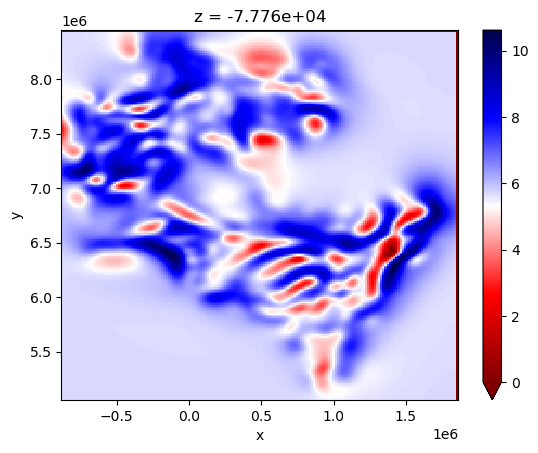

In [64]:
da.sel(z=-77760).plot(vmin=0,cmap='seismic_r')

In [66]:
da.to_dataset(name='logres').to_zarr(r'C:\Users\rscott\Downloads\Gawler\AUSLAMP\149489_00_0\AusLAMP_model_sgrid\AUSLAMP_SEA.zarr')

In [68]:
da7776 = da.sel(z=-77760)
da7776 = da7776.rio.write_nodata(-9999.0)

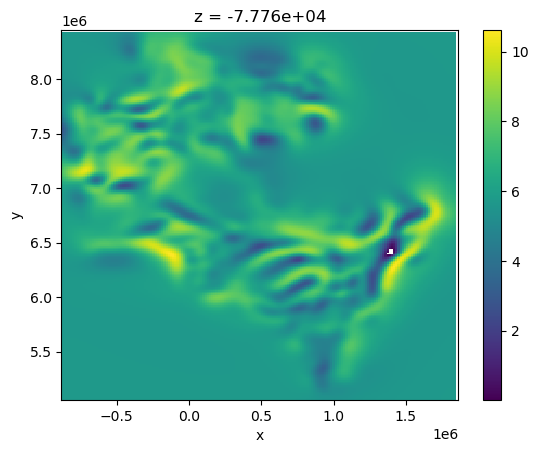

In [73]:
da7776.where(da7776 >=0,other=np.nan).plot()